This Notebook tries to test the MatrixKernelApproximation code for different unequal grid spacing.
The grid spacing are not equal for all directions. For this we will use a Gaussian in 3D to generate the volume data.

In [98]:
include("../MaternKernelApproximation.jl")

Laplace3D_Grid (generic function with 1 method)

In [160]:
function f(x,y,z)
    return exp((-x^2-y^2-z^2)/4)
end

f (generic function with 2 methods)

In [161]:
dx = 0.05
dy = 0.02
dz = 0.01
x = -1:dx:1
y = -1:dy:1;
z = -1:dz:1;
lenx = length(x);
leny = length(y);
lenz = length(z);
u = zeros(lenx, leny, lenz)
for i =1:lenx
    for j=1:leny
        for k=1:lenz
            u[i,j,k] = f(x[i],y[j], z[k]);
        end
    end
end


In [162]:
radius = 0.3
reconstructed_u, punched_u = Matern3D_Grid(x, y, z, u, 0,radius, dx, dy, dz,2); 
reconstructed_L, punched_u = Laplace3D_Grid(x, y, z, u, radius, dx, dy, dz); 

In [163]:
#Save as NPY files for plotting in Python. See PlottingNotebook.ipynb
using NPZ
npzwrite("punched_u.npy", punched_u)
npzwrite("original_u.npy", u[:] )
npzwrite("reconstructed_u.npy", reconstructed_u)

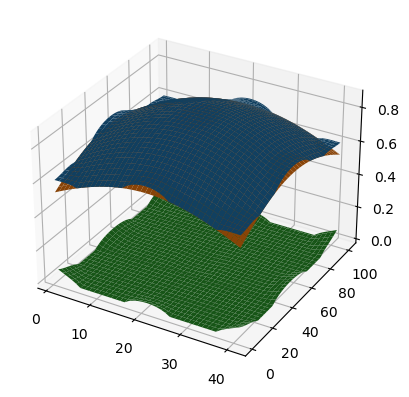

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x1737dd6d0>

In [158]:
punched_u = reshape(punched_u, lenx, leny, lenz)
reconstructed_u = reshape(reconstructed_u, lenx, leny, lenz)
reconstructed_L = reshape(reconstructed_L, lenx, leny, lenz)
l = 30
p1 = surf(reconstructed_u[:,:,l])
p2 = surf(u[:,:,l])
p3 = surf(reconstructed_u[:,:,l] - u[:,:,l])
#p4 = surf(punched_u[:,:,l])

In [154]:
norm(reconstructed_u[:,:,l] - u[:,:,l])

0.17713156018329645